<a href="https://colab.research.google.com/github/ChunkaiFu/CSCE636HW2/blob/main/CSCE636HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1:** Use the "GraidentTape API" to find the derivative of the function f(x) = sin(x) for x = 0, 0.1, 0.2 and 0.3. Submit your Jupyter notebook that shows both the code and the result you got. (10 points)


In [ ]:
import tensorflow as tf 

Define tensorflow variable x, GradientTape and calculate the gradient 

In [ ]:
x = tf.Variable([[0.], [0.1], [0.2], [0.3]])
with tf.GradientTape() as tape: 
  fx = tf.sin(x)
gradient = tape.gradient(fx, x)

Print the result 

In [ ]:
print(gradient.numpy())

[[1.       ]
 [0.9950042]
 [0.9800666]
 [0.9553365]]


**Question 2:** For the task "Classifying movie reviews: A binary classification example", tune the hyper-parameters of the model (such as changing the number of layers, changing the sizes of layers, changing the optimizer, changing the learning rate, etc.), and see if you can improve the model's performance. Submit a Jupyter notebook where you clearly show the code with the best hyper-parameters that you have found, along with its performance on training, validation and test sets. (10 points) 


In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Multi hot encoding. The work order and word frequency are lost. 

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
from tensorflow.python.keras.layers.core import Dropout
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3), 
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3), 
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])

10000 out of 25000 reviews are used in training and the rest 15000 are used for validation 

In [ ]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

Train the initial model 

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
40/40 [==============================] - 3s 54ms/step - loss: 0.6759 - accuracy: 0.5907 - val_loss: 0.6497 - val_accuracy: 0.7482
Epoch 2/20
40/40 [==============================] - 2s 49ms/step - loss: 0.6313 - accuracy: 0.6938 - val_loss: 0.5949 - val_accuracy: 0.8002
Epoch 3/20
40/40 [==============================] - 2s 48ms/step - loss: 0.5822 - accuracy: 0.7499 - val_loss: 0.5399 - val_accuracy: 0.8270
Epoch 4/20
40/40 [==============================] - 2s 48ms/step - loss: 0.5313 - accuracy: 0.7861 - val_loss: 0.4897 - val_accuracy: 0.8404
Epoch 5/20
40/40 [==============================] - 2s 48ms/step - loss: 0.4931 - accuracy: 0.8109 - val_loss: 0.4491 - val_accuracy: 0.8542
Epoch 6/20
40/40 [==============================] - 2s 49ms/step - loss: 0.4555 - accuracy: 0.8294 - val_loss: 0.4156 - val_accuracy: 0.8632
Epoch 7/20
40/40 [==============================] - 2s 48ms/step - loss: 0.4179 - accuracy: 0.8472 - val_loss: 0.3850 - val_accuracy: 0.8676
Epoch 8/20
40

The variable history.fit stores a dictionary of the loss accuracy of the training data and loss and accuracy for the validation data for each epoch. 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

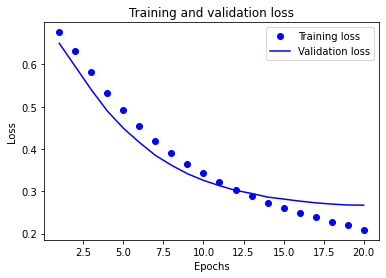

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

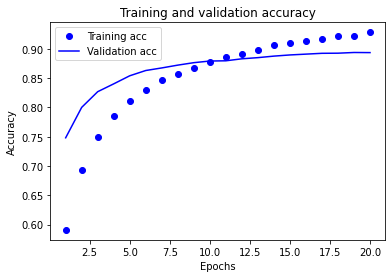

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retrain the model from scratch using the epoch number that results in the highest accuracy 

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3), 
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3), 
    layers.Dense(1, activation="sigmoid")
])
opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 4s 45ms/step - loss: 0.6679 - accuracy: 0.6098
Epoch 2/20
49/49 [==============================] - 2s 45ms/step - loss: 0.5984 - accuracy: 0.7317
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.5329 - accuracy: 0.7857
Epoch 4/20
49/49 [==============================] - 2s 45ms/step - loss: 0.4804 - accuracy: 0.8152
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.4374 - accuracy: 0.8352
Epoch 6/20
49/49 [==============================] - 2s 43ms/step - loss: 0.4015 - accuracy: 0.8529
Epoch 7/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3668 - accuracy: 0.8679
Epoch 8/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3407 - accuracy: 0.8794
Epoch 9/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3174 - accuracy: 0.8880
Epoch 10/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2956 - accuracy: 0.8935
Epoch 11/

In [ ]:
results 

[0.2756270170211792, 0.8895999789237976]

In [ ]:
model.predict(x_test)

array([[0.15247288],
       [0.9992559 ],
       [0.94791263],
       ...,
       [0.06949285],
       [0.07546988],
       [0.6019054 ]], dtype=float32)